## TASK 02

Perform data cleaning and exploratory data analysis (EDA) on a dataset. Explore the relationships between the variables and identify patterns and trends in the data. 

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Uploading Dataset :

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## About the Data :

In [5]:
print("Dataset Shape:",df.shape)

Dataset Shape: (891, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

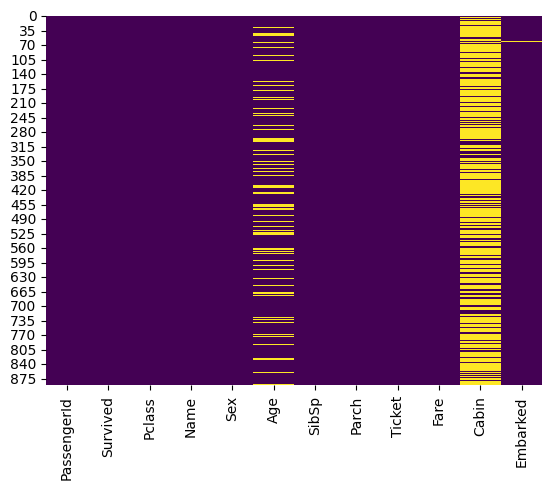

In [9]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Data Cleaning :

Handling missing values and duplicates:

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop_duplicates()
df['Pclass'] = df['Pclass'].astype('category')


## Univariate Analysis :

Categorical Columns Count Plots :

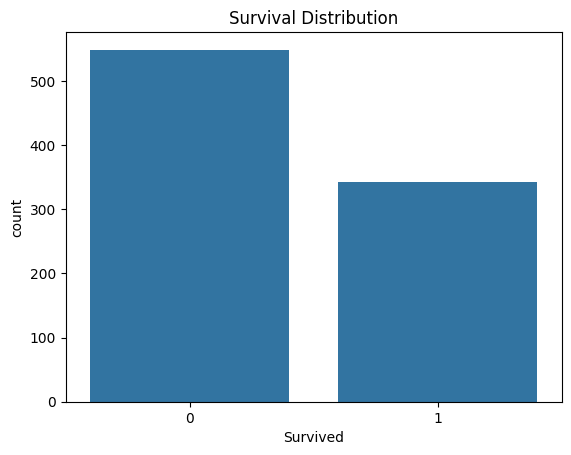

In [11]:
# Plot count of survivors (0 = No, 1 = Yes)
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

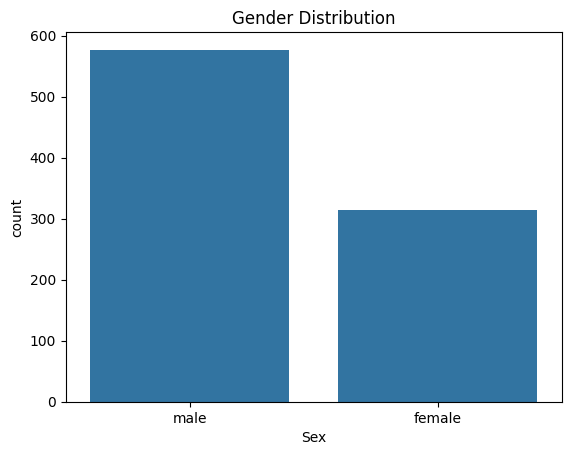

In [12]:
# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

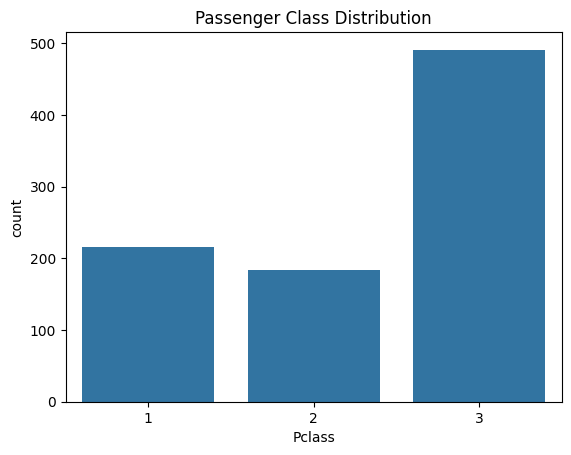

In [13]:
# Passenger class distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

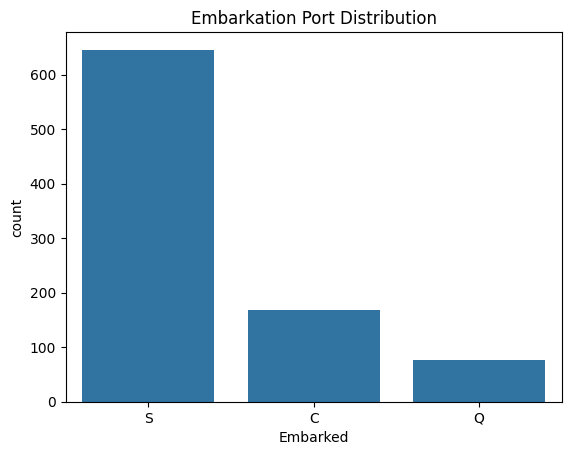

In [14]:
# Embarkation port
sns.countplot(x='Embarked', data=df)
plt.title("Embarkation Port Distribution")
plt.show()

Numerical Columns - Histograms :

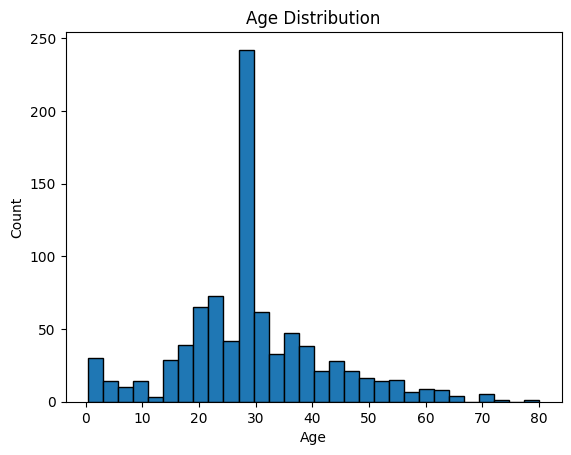

In [15]:
# Age distribution
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

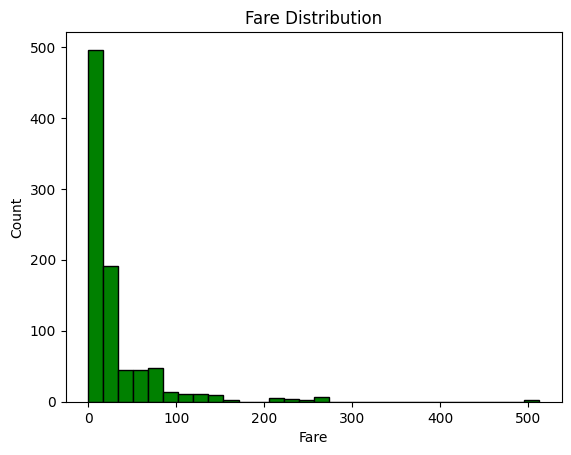

In [16]:
# Fare distribution
plt.hist(df['Fare'], bins=30, edgecolor='black', color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis :

Survival by Gender :

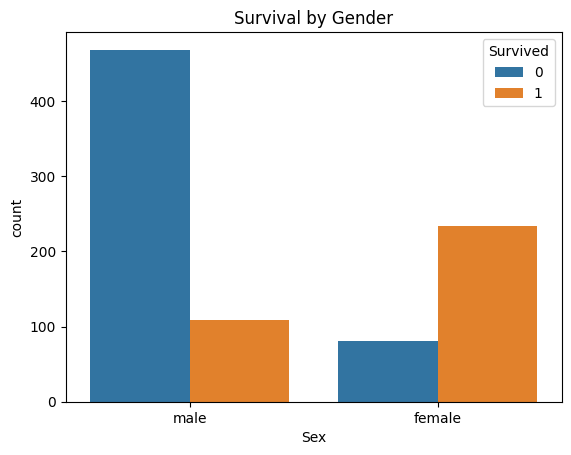

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

Survival by Passenger Class :

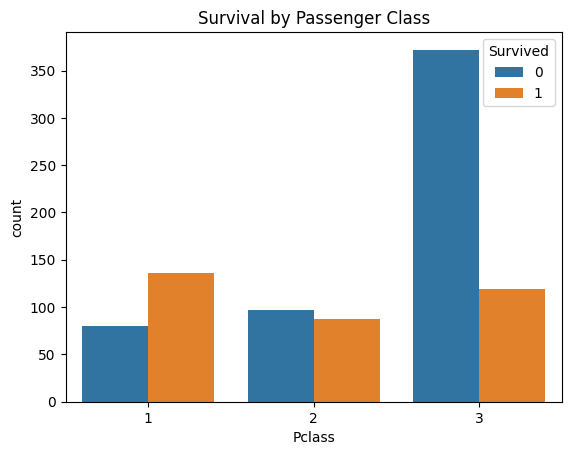

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

Boxplot: Age vs Survived :

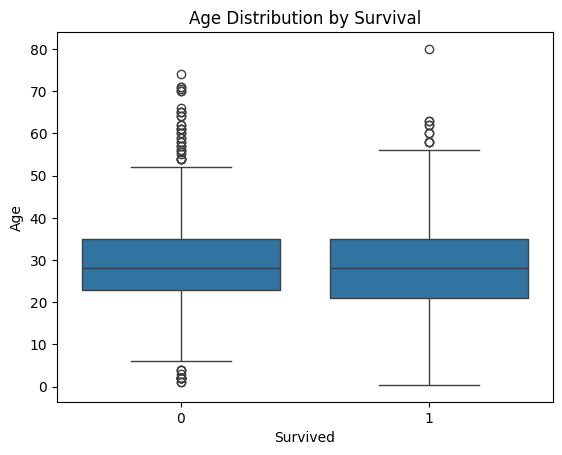

In [19]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

Survival by Embarked Port :

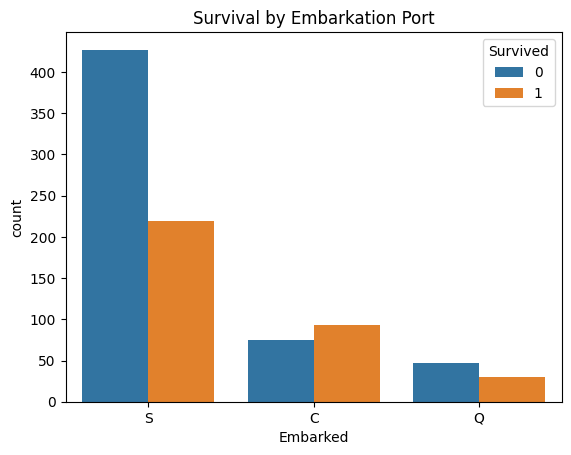

In [20]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()

## Correlation Matrix :

Encoding categorical values numerically :

In [21]:
# Encode 'Sex' and 'Embarked' for correlation
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Plot heatmap :

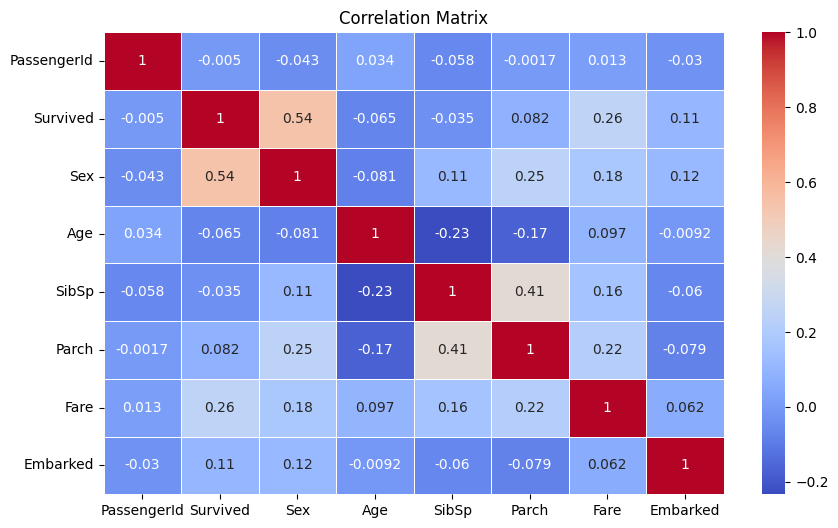

In [22]:
# Drop non-numeric columns before computing correlation
df_corr = df_encoded.drop(columns=['Name'])

# Optional: If 'Ticket' or others still exist, drop them too
df_corr = df_corr.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
df_encoded.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
dtype: object